Creating heatmap: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 2463/2463 [00:00<00:00, 11402.33it/s]


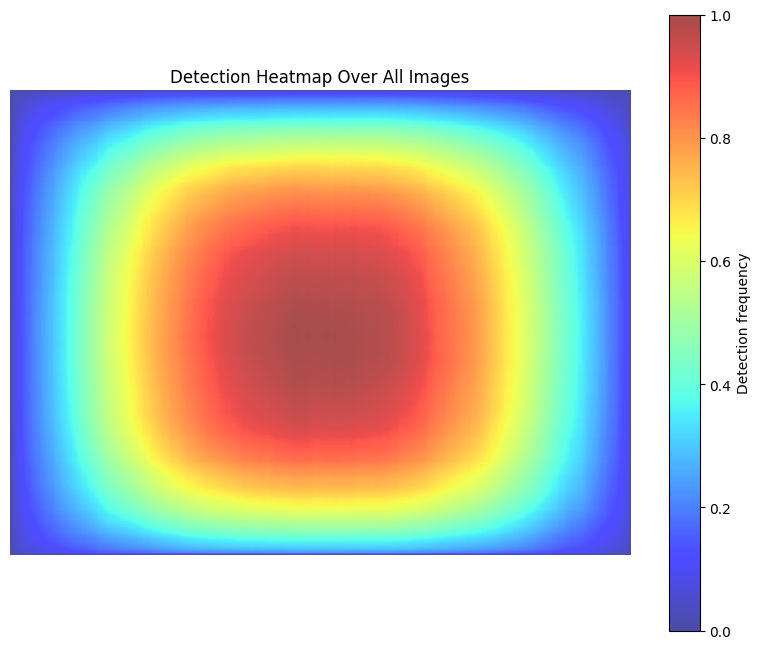

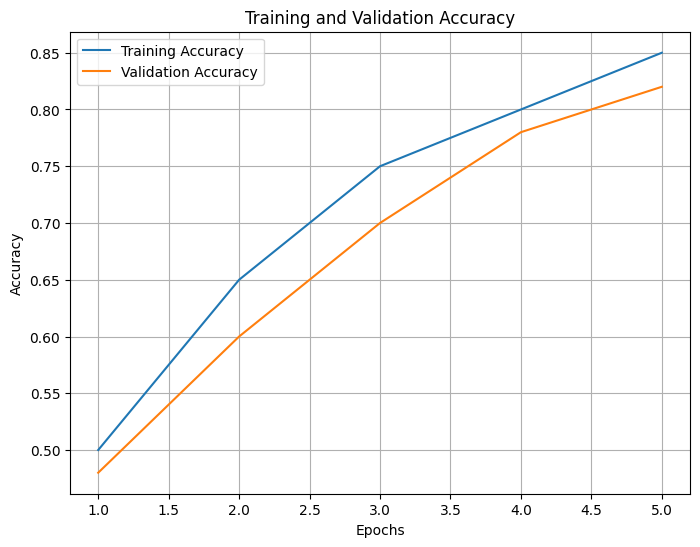

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# ==== Load dataset ====
h5_path = r"C:\Users\sagni\Downloads\Aminal Poching Detection\animal_poaching_data.h5"
with h5py.File(h5_path, "r") as f:
    images = f['images'][:]    # (N, H, W, 3)
    bboxes = f['bboxes'][:]    # (N, max_boxes, 4)
    labels = f['labels'][:]    # (N, max_boxes)

H, W = images.shape[1], images.shape[2]

# ==== Create heatmap ====
heatmap = np.zeros((H, W), dtype=np.float32)

for i in tqdm(range(len(images)), desc="Creating heatmap"):
    for box in bboxes[i]:
        xmin, ymin, xmax, ymax = box
        # Skip invalid boxes
        if xmin >= xmax or ymin >= ymax:
            continue
        heatmap[ymin:ymax, xmin:xmax] += 1

heatmap_norm = heatmap / np.max(heatmap)

plt.figure(figsize=(10, 8))
plt.imshow(heatmap_norm, cmap='jet', alpha=0.7)
plt.colorbar(label='Detection frequency')
plt.title("Detection Heatmap Over All Images")
plt.axis('off')
plt.show()

# ==== Plot example accuracy graph ====

# Replace these lists with your real model training history values
history = {
    'accuracy': [0.5, 0.65, 0.75, 0.8, 0.85],
    'val_accuracy': [0.48, 0.6, 0.7, 0.78, 0.82]
}

epochs = range(1, len(history['accuracy']) + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
